In [201]:
# Import pandas and numpy
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

# matplotlib, seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import figure_factory as FF 

In [202]:
# get titanic & test csv files as a DataFrame
titanic_df = pd.read_csv("C:\\Users\\lenovo pc\\Desktop\\Titanic\\train.csv",encoding ="utf-8-sig")
test_df    = pd.read_csv("C:\\Users\\lenovo pc\\Desktop\\Titanic\\test.csv",encoding ="utf-8-sig")
titanic_df1 = pd.read_csv("C:\\Users\\lenovo pc\\Desktop\\Titanic\\train.csv",encoding ="utf-8-sig")
test_df1 = pd.read_csv("C:\\Users\\lenovo pc\\Desktop\\Titanic\\test.csv",encoding ="utf-8-sig")
full = pd.concat([titanic_df, test_df],sort='True')
# preview the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In the dataframe, each row represents a passenger on the Titanic, and each column represents some information about them. Let's take a look at what the columns represent:

Survived: Outcome of survival (0 = No; 1 = Yes)

Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)

Name: Name of passenger

Sex: Sex of the passenger

Age: Age of the passenger (Some entries contain NaN)

SibSp: Number of siblings and spouses of the passenger aboard

Parch: Number of parents and children of the passenger aboard

Ticket: Ticket number of the passenger

Fare: Fare paid by the passenger

Cabin Cabin number of the passenger (Some entries contain NaN)

Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)


# Understanding the data
### Before we move on with the actual analysis, we will use pandas .shape and .describe() method to understand our data better. We will also examine how well individual features- like Sex, Age, Pclass, Fare, Port of embarkation predict survival.

In [203]:
print(titanic_df.shape)

(891, 12)


In [204]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [205]:
titanic_df.info()
print("----------------------------------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         

## How does the distribution of survival look like?

In [206]:
# 0 = deceased, 1 = survived
print(titanic_df["Survived"].value_counts())

0    549
1    342
Name: Survived, dtype: int64


In [207]:
# Passengers that survived vs passengers that passed away
deceased = titanic_df["Survived"].value_counts(normalize = True)[0]
survived = titanic_df["Survived"].value_counts(normalize = True)[1]

x0 = ['deceased', 'survived']
y0 = [deceased, survived]

data = [go.Bar(
        x=x0,
        y=y0
    )]
layout = go.Layout(autosize = False, width = 300, height = 400,
              yaxis = dict(title = 'Normalized counts'),
              title = 'Distribution of survival')
fig0 = go.Figure(data = data, layout = layout)

fig0.show()

### The majority of passengers (61.6%) didn't survive the sinking ship.

### Filling out some missing values

#### Filling out the missing embarkment

In [208]:
# just to show the numbers
full.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

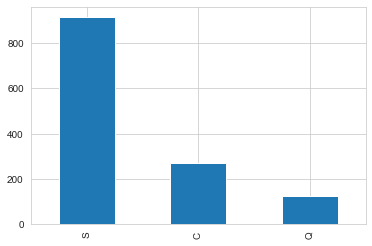

In [209]:
# or maybe even more convincing: A plot!
full.Embarked.value_counts().plot(kind='bar')


It looks like we miss a embarkment port for two passengers in titanic dataframe. Let's not make a big thing about this, and assume that the the passengers embarked in Southampton. That is natural enough as most passengers embarked in Southampton. I also don't believe that the embarkment port is a real big indicator to predict survival. Southampton it is!

In [210]:
# See? It's pretty safe two assume they came for Southampton
titanic_df.Embarked.fillna(value='S', inplace=True)
# Let's update the full dataframe as well:
full.Embarked.fillna(value='S', inplace=True)

#### Filling out the missing fare

In [211]:
test_df[np.isnan(test_df["Fare"])]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


There is only one passenger where the fare is missing.

We will fill this in with the median fare of the passengers for that embarkment port (S) on that passenger class (Third).

In [212]:
# Mr. Storey from Southampton in third class.
test_df.loc[test_df["PassengerId"] == 1044, "Fare"] = full[(full["Embarked"]=='S') & (full["Pclass"]==3)].Fare.median()
test_df.loc[test_df["PassengerId"]==1044,:]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,8.05,NaN,S


8.05 GBP from Mr. Storey! Sounds good enough!

### Filling out the missing ages
#### Age filling strategy:-

There was a "Women and children first" policy for filling up the lifeboats, so the important thing to consider is if a passenger with missing age was considered a child or adult. So to fill in the missing age data we will use the title of the person, and fill in the median age for the given title.

It is important to understand that someone with title Master is typically a young boy who will be considered a child. Master was used address politely a boy who was too young to be called Mister. Also, a Miss is typically unmarried and younger than a Mrs, so hopefully the strategy will help us get good values for the missing ages.

So the first step will be to make an additional column with the Title, in all three dataframes. Megan has already showed us that the title of a passenger is actually an important predictor. So we will add the column and keep it there for later.

In [213]:
# So let's add a title column to each DataFrame
# we also make a list of all our frames, such that we can easily loop over them.
frames = [titanic_df, test_df, full]
for df in frames:
    df["Title"] = df.Name.str.replace('(.*, )|(\\..*)', '')

In [214]:
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


Looks like that worked fine! Let's see how many unique titles there are, and how many unique titles we need to fill in the age

In [215]:
# That went good. There are 18 unique titles.
full["Title"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Mlle              2
Major             2
Ms                2
Mme               1
Capt              1
Lady              1
Don               1
Dona              1
Sir               1
Jonkheer          1
the Countess      1
Name: Title, dtype: int64

In [216]:
# Let's check which titles that are missing age data
full[np.isnan(full["Age"])].Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Dr', 'Ms'], dtype=object)

OK. There are only 6 types of titles that is missing age data. The thing that comes to attraction is that there is both a Miss and a Ms title. Without much considerations,we are joining the Ms titled with Miss titled. Then it's only 5 titles to fill with age.

In [217]:
# Hmmm what's the difference of Miss and Ms?
full[full["Title"]=="Ms"]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
443,28.0,NaN,S,13.00,"Reynaldo, Ms. Encarnacion",0,444,2,female,0,1.0,230434,Ms
88,NaN,NaN,Q,7.75,"O'Donoghue, Ms. Bridget",0,980,3,female,0,NaN,364856,Ms


In [218]:
# Let's just set the two Ms to Miss. 
for df in frames:
    df.loc[df["Title"]=="Ms", "Title"] = "Miss"

Yes! Then we are ready for the real filling of all missing ages.

In [219]:
# So here is the main juice. Assign the missing age to the median age with the given title.
for t in full[np.isnan(full["Age"])].Title.unique():
    for df in frames:
        df.loc[(df["Title"]==t) & np.isnan(df["Age"]), "Age" ] = full[full["Title"]==t].Age.median()

### Filling out the missing cabin
There are so many missing cabins in the dataset that we will not even try to fill in the missing elements. We will however try to extract some information from this later.

# Feature Engineering

We do indeed already have some features, but I think we should try to extract some more. We have the passenger class, the sex, the age, #siblings_and_spouses, and #childern_and_parents, the embarkment port and the fare. We've also extracted a Title from the name column. However, I think we can gain some more. Let's consider the cabin first.

### Engineering a cabin feature

Important to note: The way to survive is to get onboard a lifeboat. At the RMS Titanic there were 20 lifeboats, however only 18 were used. There were less capacity of the lifeboats than the number of passengers and crew onboard. Numbers from wikipedia says there was a capacity of 1178 passengers in the lifeboats. There were 2224 on board (crew included). Since there was not enough capacity of the lifeboats to evacuate everyone, the "Women and children first" policy were applied.

#### A side note on the low capacity of the lifeboats

We may think today that it was really strange to have less capacity of lifeboats than number of passengers and crew. However, the number of lifeboats was well within the maritime laws and regulations of the time. The next question that then comes up is: Why was the maritime regulation not requiring any liner to have lifeboat capacity for every passenger and crew member? The answer to this is that there never were any concern that all passengers had to be evacuated over a relatively short period of time. A ship in distress would probably stay afloat for many hours. First of all there was a lot of maritime traffic of those days, and a liner in distress would always be able to call for assistance from a nearby vessel and evacuate the personnel to that vessel. The vessels were equipped with wireless telegraphs. That was the common philosophy of the time, and that was the reason why this was not considered a problem. After all, Titanc was the ship that could not sink. It was called the ship that could not sink due to the double bottom and the watertight bulkheads. However the bulkheads was not sealed with a ceiling, so when each bulkhead was filled with water, the water simply flooded over to the next bulkhead. She was hence not so unsinkable after all.

#### A feature for the cabin side

This is indeed a bit interesting. The "Women and children first" policy was indeed enforced differently on the port and starboard side of the ship, so the side of the cabin could be a useful predictor in our analysis. Cabin numbers ending with an odd number indicates that the cabin was on starboard side, while cabins ending on an even number were located on the port side. Let's create a feature called CabinSide that takes the values unknown, starboard or port.

In [220]:
# Let's look at the cabin a bit. This might be important. The "Women and Children" policy was enforced differently on
# starboard and port side. Odd numbered cabins are starboard side, and even numbers are port side.
for df in [titanic_df, test_df]:
    df["CabinSide"] = "Unknown"
    df.loc[pd.notnull(df["Cabin"]) & df["Cabin"].str[-1].isin(["1", "3", "5", "7", "9"]),"CabinSide"] = "Starboard"
    df.loc[pd.notnull(df["Cabin"]) & df["Cabin"].str[-1].isin(["0", "2", "4", "6", "8"]),"CabinSide"] = "Port"

We need some cleanup. The Ryersons had four cabins, three on starboard and one on port. It is natural to set them all on starboard, as they probably gathered. They traveled with ticket PC 17608, so we use that to index the rows of Ryersons & co.

In [221]:
for df in [titanic_df, test_df]:
    df.loc[df["Ticket"]=="PC 17608", "CabinSide"] = "Starboard"

It is also natural to assume that Bowen, Miss. Grace Scott was in cabin B68. According to sources she was the maid for the Ryersons and the deck plan drawing shows this cabin as a maids/servant cabin.

In [222]:
test_df.loc[test_df["Name"].str.contains("Bowen,"),"Cabin"] = "B68"

In [223]:
titanic_df.CabinSide.value_counts()

Unknown      691
Port         108
Starboard     92
Name: CabinSide, dtype: int64

#### A feature for the cabin deck

Lower deck cabins where flooded with water before the higher level deck. Is it natural to think that passengers on low decks gathered to the lifeboats earlier than the passengers at the higher decks? At least I will try out a feature based on the deck. The deck is labeld as the first letter in the cabin number. A-G, where A is the highest and G is the lowest.

In [224]:
# Maybe the Deck is important? who knows?
for df in [titanic_df, test_df]:
    df["Deck"] = "Unknown"
    df.loc[pd.notnull(df["Cabin"]), "Deck"] = df["Cabin"].str[0]

We need some cleanup as some cabins are numbered "F Gxx".It means "Fore" deck "G" cabin "xx".

In [225]:
titanic_df.loc[titanic_df.Cabin.str.len() == 5,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,CabinSide,Deck
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mr,Starboard,F
128,129,1,3,"Peter, Miss. Anna",female,22.0,1,1,2668,22.3583,F E69,C,Miss,Starboard,F
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S,Mr,Starboard,F
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S,Mr,Starboard,F


In [226]:
for df in [titanic_df, test_df]:
    df.loc[pd.notnull(df["Cabin"]) & (df.Cabin.str.len() == 5), "Deck"] = df["Cabin"].str[2]


In [227]:
test_df.loc[test_df.Cabin.str.len() == 5,:]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,CabinSide,Deck
57,949,3,"Abelseth, Mr. Olaus Jorgensen",male,25.0,0,0,348122,7.6500,F G63,S,Mr,Starboard,G
288,1180,3,"Mardirosian, Mr. Sarkis",male,29.0,0,0,2655,7.2292,F E46,C,Mr,Port,E
321,1213,3,"Krekorian, Mr. Neshan",male,25.0,0,0,2654,7.2292,F E57,C,Mr,Starboard,E


### Test all the decks.

In [228]:
titanic_df.Deck.value_counts()

Unknown    687
C           59
B           47
E           33
D           33
A           15
F            9
G            7
T            1
Name: Deck, dtype: int64

### A family size feature.
I really don't believe that this gains better classification than the SibSp and ParCh features separated, since they are linear correlated. I see that a lot of other scripts has this featere, so I'm adding this for the fun of it.

In [229]:
# Let's define another feature. FamilySize = Parch + SibSp + 1
for df in frames:
    df["FamilySize"] = df.Parch + df.SibSp + 1

### Ticket group size feature
The ticket looks like they were sold in groups. Can the size of the ticket group be used as an indicator? That will catch other relations than the family relations on ParCh and SibSp, like valet, servant, maid etc. This may or may not improve the predictions. Such a feature will of course be strongly related to family size, and may therefore not improve the predictions as much as I hope. Also, there are some tickets that are issues with sequential numbers even for groups traveling together.

We will create a python dictionary with the ticket number as the key, and the number of tickets with that key.

In [230]:
# Ticket group size
# first we make a dictionary
ticket_dict = {}
for t in full.Ticket.unique():
    ticket_dict[t] = 0
for t in full.Ticket:
    ticket_dict[t] += 1

# Then we apply it to the dataframes
for df in frames:
    df["TicketGroupSize"] = df["Ticket"].apply( lambda x: ticket_dict[x])

### Ticket group survivors feature
Here is my last predictor for today. For each ticket group, we will count the other survivors in that group. If there is a everybody or nobody connection in the traveling group, this may be a good predictor. Also, a non-linear classifier may also be able to find relations like everybody except the adult male connections in the data. That is why I hope this feature can gain something.



In [231]:
for t in full.Ticket.unique():
    ticket_dict[t] = 0
for row in full.iterrows():
    t = row[1]["Ticket"]
    if row[1]["Survived"] > 0.1:
        ticket_dict[t] += 1
        
# Then we apply this to the dataframes
for df in [titanic_df, test_df]:
    df["TicketGroupSurvivors"] = df["Ticket"].apply( lambda x: ticket_dict[x])


This feature can gain something, however it may be biasing a prediction towards death to singleton traveling passengers. A singleton passenger (in this case a passenger with a unique ticket number) will have either 0 ot 1 in this feature. The passenger will always have 0 as TicketGroupSurvivors in the test set, and a classifier will train to predicting this as a non-survivor, This feature can therefore may be really bad, rather than smart.

In [232]:
# The remedy could be to subtract one form TicketGroupSurvivors where a singleton survived.
# Here is the remedy:
titanic_df.loc[titanic_df["TicketGroupSize"] == 1, ["Survived", "TicketGroupSurvivors"]] = 0

# Feature Preparation
To be able to use the features, we have to convert them into numeric values. Some of our features are already numerical. It is often a good idea to normalize those features. Some of the features are categorical. For categorical features, we simply make indicator (dummy) features.

In [233]:
# Normalizer
def normalize(feat):
    mean = full[feat].mean()
    stdv = full[feat].std()
    for df in [titanic_df,test_df]:
        df[feat + "_norm"] = (df[feat] - mean) / stdv

## Features to normalize

Some features should be normalized, others not. Let's discuss.

#### Age

Age is already a numeric value. This makes more sense to normalize, at the values are much higher than other numeric features. 

#### SibSp, ParCh and Family size.

Just plain normalize all of these. An alternative to be to group then into categories, but let's wait with that.

#### Fare

This is interesting. Is the fare of the ticket based on the ticket group size? Maybe the fare should be divided by the size of the ticket group size and then normalized? Maybe even this should be adjusted and normalized to the fare based on the given class. Let's investigate that later, and just do a plain normalization for now.

#### Passenger Class (Pclass)

This is indeed a numeric value, but we would rather consider this categorical feature than numerical. Let's not normalize this feature.

#### TicketGroupSize

Just normalize this.

In [234]:
# Age, SibSp, ParCh, FamilySize, Fare and TicketGroupSize. Those are the ones.
[normalize(x) for x in ["Age", "SibSp", "Parch", "FamilySize", "Fare", "TicketGroupSize"]]

[None, None, None, None, None, None]

In [235]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Deck,FamilySize,TicketGroupSize,TicketGroupSurvivors,Age_norm,SibSp_norm,Parch_norm,FamilySize_norm,Fare_norm,TicketGroupSize_norm
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,Unknown,2,1,0,-0.564205,0.481104,-0.444829,0.073324,-0.503210,-0.618937
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,2,2,1,0.651110,0.481104,-0.444829,0.073324,0.733941,-0.057086
2,3,0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,Unknown,1,1,0,-0.260376,-0.478904,-0.444829,-0.558133,-0.490169,-0.618937
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,C,2,2,1,0.423238,0.481104,-0.444829,0.073324,0.382632,-0.057086
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,Unknown,1,1,0,0.423238,-0.478904,-0.444829,-0.558133,-0.487754,-0.618937


## Categorical features.

#### Sex

Let's begin with Sex since it's the first thing that comes to my mind (no pun intended). Sex is a categorical value, but it can only take two different values: female or male. Note that is should not be necessary to have two features, with one Sex_male and another Sex_female, as that will just make to directly linear correlated values. This actually applies to all categorical features. I will therefore drop the most populated category. For sex, the baseline category will be male, and hence sex_male will be dropped.

#### Passenger class (Pclass)

I will we can treat this as categorical data. I think I'll handle this as categorical data. I will drop Pclass_3 as the baseline category.

#### Embarkment port

Let's just make a categorical inputs for each port. I'll drop Embarked_S as baseline.

#### CabinSide

Plain categorical. Starboard and Port, I will drop CabinSide_unknown as the baseline case.

#### CabinDeck

I will also do categories on the deck even though a plain numerical value could be considered. Deck_Unknown will be dropped as baseline.

#### Title

Title is an important feature. However we need to reduce number of titles. Some of the titles are rare and should not have their own category. I suggest these title categories: Mr, Mrs, Miss, Master, Rev, Officer, Royal.

In [236]:
full["Title"].value_counts()

Mr              757
Miss            262
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Mlle              2
Major             2
Mme               1
Capt              1
Lady              1
Don               1
Dona              1
Sir               1
Jonkheer          1
the Countess      1
Name: Title, dtype: int64

In [237]:
# These can be discussed, of course.
titledict = {"Dr"   : "Mr",
             "Col"  : "Officer",
             "Mlle" : "Miss",
             "Major": "Officer",
             "Lady" : "Royal",
             "Dona" : "Royal",
             "Don"  : "Royal",
             "Mme"  : "Mrs",
             "the Countess": "Royal",
             "Jonkheer": "Royal",
             "Capt" : "Officer",
             "Sir"  : "Mr"
             }
for df in frames:
    for key,val in titledict.items():
        df.loc[df["Title"]==key, "Title"] = val

In [238]:
full["Title"].value_counts()

Mr         766
Miss       264
Mrs        198
Master      61
Rev          8
Officer      7
Royal        5
Name: Title, dtype: int64

Then we have only seven titles. Let's create the indicator variables.

In [239]:
category_list = ["Pclass", "Sex", "Embarked", "Title", "CabinSide", "Deck"]
titanic_df = pd.get_dummies(titanic_df, columns=category_list)
test_df = pd.get_dummies(test_df, columns=category_list)

#### TicketGroupSurvivors
Maybe this can be divided by the size of the group?

In [240]:
for df in [titanic_df, test_df]:
    df["TGS_norm"] = df["TicketGroupSurvivors"] / df["TicketGroupSize"]

In [241]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'FamilySize', 'TicketGroupSize',
       'TicketGroupSurvivors', 'Age_norm', 'SibSp_norm', 'Parch_norm',
       'FamilySize_norm', 'Fare_norm', 'TicketGroupSize_norm', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Officer', 'Title_Rev', 'Title_Royal',
       'CabinSide_Port', 'CabinSide_Starboard', 'CabinSide_Unknown', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T',
       'Deck_Unknown', 'TGS_norm'],
      dtype='object')

In [242]:
test_df.columns

Index(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'FamilySize', 'TicketGroupSize', 'TicketGroupSurvivors',
       'Age_norm', 'SibSp_norm', 'Parch_norm', 'FamilySize_norm', 'Fare_norm',
       'TicketGroupSize_norm', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer',
       'Title_Rev', 'Title_Royal', 'CabinSide_Port', 'CabinSide_Starboard',
       'CabinSide_Unknown', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
       'Deck_F', 'Deck_G', 'Deck_Unknown', 'TGS_norm'],
      dtype='object')

# Exploratory Data Analysis

### Who was more likely to survive Female or Male?

In [243]:
# Normalized male survival
male_survival = titanic_df1["Survived"][titanic_df1["Sex"] == 'male'].value_counts(normalize = True)
# Normalized female survival
female_survival = titanic_df1["Survived"][titanic_df1["Sex"] == 'female'].value_counts(normalize = True)

# Survival by Sex
x0 = ['male', 'female']
y0 = [male_survival[1], female_survival[1]]
data = [go.Bar(
        x=x0,
        y=y0
    )]
layout = go.Layout(autosize = False, width = 300, height = 400,
              yaxis = dict(title = 'Survival Rates'),
              title = 'Survival by Sex')
fig1 = go.Figure(data = data, layout = layout)
fig1.show()

#### Examining the survival statistics, 74.2% of all females from the dataset survived the ship sinking, whereas only 18.9% of males survived the ship sinking.

## How does the distribution of age look among survivors and non-survivors?
It's logical to think that children were saved first. Age could be another variable to predict survival.Let's check it out:-

In [244]:
#Age distribution of those who passed away
ages_deceased = titanic_df1["Age"][titanic_df1["Survived"] == 0]

#Age distribution of survivors
ages_survived = titanic_df1["Age"][titanic_df1["Survived"] == 1]

#Boxplot to show age distribution of deceased vs survived
trace_deceased = go.Box(x = ages_deceased, name = "deceased")
trace_survived = go.Box(x = ages_survived, name = "survived")
survival_by_age_data = [trace_deceased, trace_survived]
layout = go.Layout(xaxis = dict(title = 'Age'),title = "Survival by Age", 
                   width = 600, height = 400)
fig2 = go.Figure(data=survival_by_age_data, layout=layout)

fig2.show()

The age distribution for those who survived is shifted more towards the left. Albeit modestly, age does seem to correlate with survival. We will further test this assumption by creating a "child" column.

## How does survival rate change across Pclass?
It's also logical to think that passenger class might affect the outcome, as first class cabins were closer to the deck of the ship.

In [245]:
# Normalized Pclass survival
Pclass1 = titanic_df1["Survived"][titanic_df1["Pclass"] == 1].value_counts(normalize = True)
Pclass2 = titanic_df1["Survived"][titanic_df1["Pclass"] == 2].value_counts(normalize = True)
Pclass3 = titanic_df1["Survived"][titanic_df1["Pclass"] == 3].value_counts(normalize = True)

# Survival by Pclass- Barplot
x0 = ['Pclass 1', 'Pclass 2', 'Pclass 3']
y0 = [Pclass1[1], Pclass2[1], Pclass3[1]]

data = [go.Bar(
        x=x0,
        y=y0
    )]
layout = go.Layout(autosize = False, width = 400, height = 400,
              yaxis = dict(title = 'Survival Rates'),
              title = 'Survival by Pclass')
fig3 = go.Figure(data = data, layout = layout)

fig3.show()

### Examining the survival statistics, survival rates for Pclass1 > Pclass2 > Pclass3. 63%, 47.3% and 24.2% of Pclass1, Pclass2 and Pclass3 survived respectively.

## How does the distribution of fare look among survivors and non-survivors?
#### Fare is highly correlated with Pclass. It could be another variable to influence survival.

In [246]:
#Fare paid by those who passed away
fares_deceased = titanic_df1["Fare"][titanic_df1["Survived"] == 0]

#Fare paid by survivors
fares_survived = titanic_df1["Fare"][titanic_df1["Survived"] == 1]

#Survival by fare - Boxplot
trace0 = go.Box(x = fares_deceased, name = "deceased")
trace1 = go.Box(x = fares_survived, name = "survived")
fare_by_survival_data = [trace0, trace1]
layout = go.Layout(xaxis = dict(title = 'Fare'),title = "Survival by Fare",
                   width = 800, height = 600)
fig4 = go.Figure(data=fare_by_survival_data, layout=layout)

fig4.show()

#### The fare distribution for those who survived is shifted more towards the right. Most survivors definitely paid higher than non-survivors.

## Does Port of embarkation play a role?

In [247]:
S = titanic_df1["Survived"][titanic_df1["Embarked"] == "S"].value_counts(normalize = True)
C = titanic_df1["Survived"][titanic_df1["Embarked"] == "C"].value_counts(normalize = True)
Q = titanic_df1["Survived"][titanic_df1["Embarked"] == "Q"].value_counts(normalize = True)

# Survival by Embarked - Boxplot
x0 = ['S', 'C', 'Q']
y0 = [S[1], C[1], Q[1]]

data = [go.Bar(
        x=x0,
        y=y0
    )]
layout = go.Layout(autosize = False, width = 400, height = 400,
              yaxis = dict(title = 'Survival Rates'),
              title = 'Survival by Embarked')
fig5 = go.Figure(data = data, layout = layout)
fig5.show()

### Looks like there is correlation here. People who embarked from Cherbourg had a higher chance of survival than the other ports. This dosen't make sense on its own. Maybe there is another factor at play here. Lets study the survival rates taking into account multiple features

## Multiple variable (2d) explorations

### We will now explore multiple combination of variables to see how well they correlate with survival.

Lets check for Survival rate with Pclass and Sex together

In [248]:
pd.crosstab([titanic_df1["Sex"], titanic_df1["Survived"]], titanic_df1["Pclass"], margins = True).style.background_gradient(cmap = 'summer_r')

C:\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



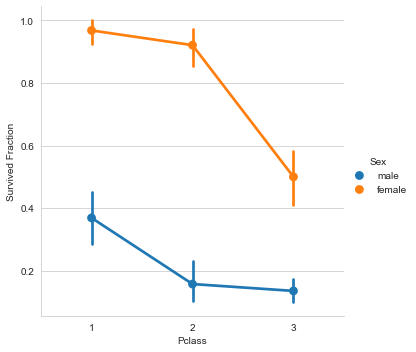

In [249]:
sns.factorplot(x = "Pclass", y = "Survived", hue = "Sex", data = titanic_df1)
plt.ylabel("Survived Fraction")
plt.show()

#### The survival rate for women is better than men irrespective of class. Though the survival rate in general decreases as with decrease in socio economic status. Therefore both of these features are necessary for our analysis.



We earlier figured out that Cherbourg had the highest survival rate. Did majority of people from class 1 embarked from Cherbourg ?

In [250]:
pd.crosstab([titanic_df1["Pclass"], titanic_df1["Survived"]],titanic_df1["Embarked"], margins = True).style.background_gradient(cmap = 'summer_r')

C:\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



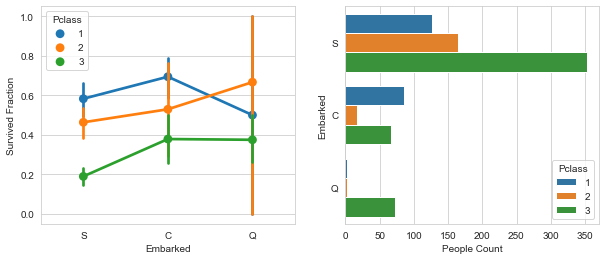

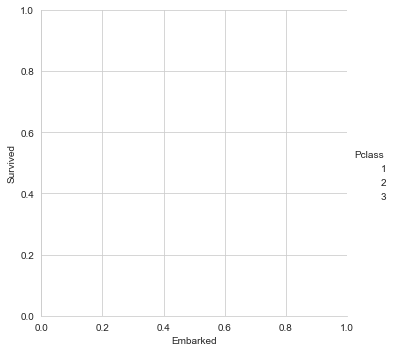

In [251]:
f, ax = plt.subplots(1, 2, figsize = (10, 4))

sns.factorplot(x = "Embarked", y = "Survived", hue = "Pclass", data = titanic_df1, ax = ax[0])
ax[0].set_ylabel("Survived Fraction")

sns.countplot(y = "Embarked", hue = "Pclass", data = titanic_df1, ax = ax[1])
ax[1].set_xlabel("People Count")

plt.show()

C:\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



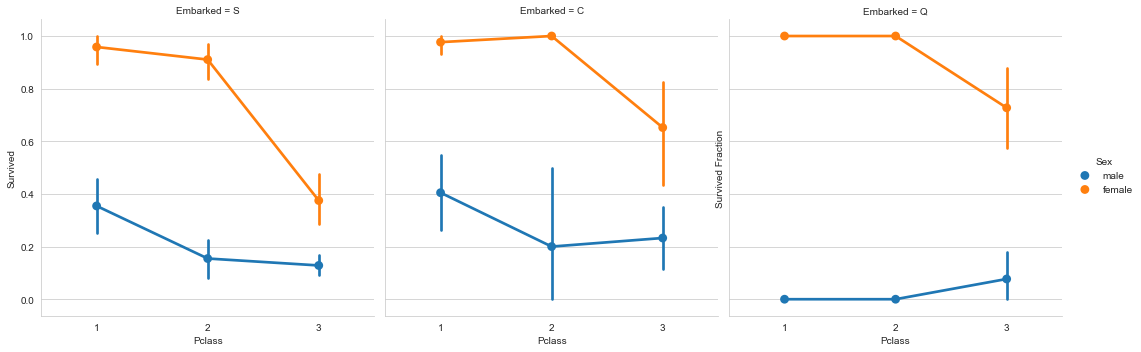

In [252]:
sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', col = 'Embarked', data = titanic_df1)
plt.ylabel("Survived Fraction")

plt.show()

### From Graph 2 (Count Plot):

Majority of class 1 people actually boarded from Southampton but the proportion of class 1 people is highest in Cherbourg and is almost 50%. Maybe thats why majority of people who boarded from Cherbourg had a decent rate of survival.

### From Graph 1 (Factor Plot):

People of the same class have almost the same rate of survival among the different ports(There are some exceptions :- Class 3 people for Southampton had a lower rate of survial than the same class people who boarded from other ports and Class 2 people from Q had a higher rate of survival, even higher than class 1 people(Gender may be at play here as we can see from the last graph))

### From Graph 3 (Multi-column-factor-plot):

Port of embarkation may not then be a good feature to determine the survival rate since once you break it down to the level of Pclass and Gender, the survival rate is almost the same irrespective of Embarkation.

#### Did Parch (Number of parents onboard)/ SibSp (Number of siblings/ spouses onboard) had any affect on Survival?


SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


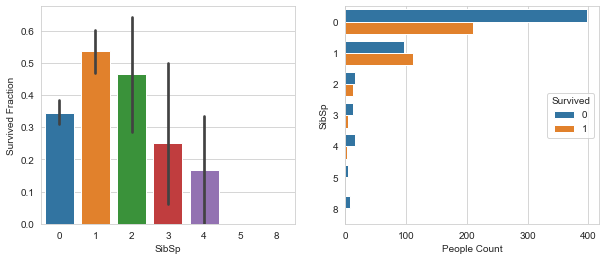

In [253]:
print(titanic_df1.groupby("SibSp")["Survived"].mean())

f, ax = plt.subplots(1, 2, figsize = (10, 4))

sns.barplot(x = "SibSp", y = "Survived", data = titanic_df1, ax = ax[0])
ax[0].set_ylabel("Survived Fraction")

sns.countplot(y = "SibSp", hue = "Survived", data = titanic_df1, ax = ax[1])
ax[1].set_xlabel("People Count")

plt.show()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


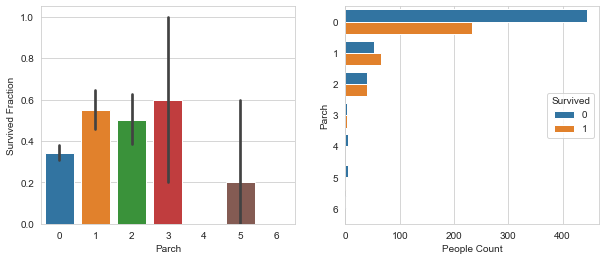

In [254]:
print(titanic_df1.groupby("Parch")["Survived"].mean())

f, ax = plt.subplots(1, 2, figsize = (10, 4))

sns.barplot(x = "Parch", y = "Survived", data = titanic_df1, ax = ax[0])
ax[0].set_ylabel("Survived Fraction")

sns.countplot(y = "Parch", hue = "Survived", data = titanic_df1, ax = ax[1])
ax[1].set_xlabel("People Count")

plt.show()

More Sibling or spouses, less the chances of survival. But people who had no sibling/ spouses had an even lesser chance of survival. Were most of these people were males? Did these people help others before helping themselves ? Same is the case with parch. In a nutshell, Bigger families had less survival rate, but there survival rate is better then people who travelled alone.

### Was there chivalry at work - Women and Child first ?

We saw that age influenced survival. It is logical to think that children were saved first. We created a new column with a categorical variable Child. Child will take a value 1 for ages < 10 and a value of 0 for ages >= 10.

In [255]:
# Create the column Child and assign 1 to passengers under 10, 
# 0 to those 10 or older and NaN if age is NaN
def is_child(age):
    """Defines what age is considered a child"""
    if age < 10:
        return float(1)
    elif age >= 10:
        return float(0)
    else:
        return float('NaN')
# apply the function to 'Age' column of the dataframe
titanic_df1['Child'] = titanic_df1['Age'].apply(is_child)

In [256]:
# Print normalized Survival Rates for passengers under 10
children = titanic_df1['Survived'][titanic_df1['Child'] == 1].value_counts(normalize = True)

# Print normalized Survival Rates for passengers 10 or older
adult = titanic_df1['Survived'][titanic_df1['Child'] == 0].value_counts(normalize = True)

# Plot survival of children vs adults
x0=['children', 'adult']
y0=[children[1], adult[1]]

data = [go.Bar(
        x=x0,
        y=y0
    )]
layout = go.Layout(autosize = False, width = 300, height = 400,
              yaxis = dict(title = 'Survival Rates'),
              title = 'Children vs Adults')
fig6 = go.Figure(data = data, layout = layout)
fig6.show()

In [257]:
# Normalised survival by sex and age
male_child = titanic_df1["Survived"][(titanic_df1["Sex"] == 'male') & 
                               (titanic_df1["Child"] == 1)].value_counts(normalize = True)
male_adult = titanic_df1["Survived"][(titanic_df1["Sex"] == 'male') & 
                               (titanic_df1["Child"] == 0)].value_counts(normalize = True)

female_child = titanic_df1["Survived"][(titanic_df1["Sex"] == 'female') & 
                                 (titanic_df1["Child"] == 1)].value_counts(normalize = True)
female_adult = titanic_df1["Survived"][(titanic_df1["Sex"] == 'female') & 
                                 (titanic_df1["Child"] == 0)].value_counts(normalize = True)

trace0 = go.Bar(
    x=['male', 'female'],
    y=[male_child[1], female_child[1]],
    name='child (<10)'
)
trace1 = go.Bar(
    x=['male', 'female'],
    y=[male_adult[1], female_adult[1]],
    name='adult'
)

data = [trace0, trace1]
layout = go.Layout(autosize = False, width = 500, height = 400,
                   barmode='group',
                   yaxis = dict(title = 'Survival Rates'),
                   title = 'Women and Children First')

fig7 = go.Figure(data=data, layout=layout)
fig7.show()

### There was chivalry at work - women and children first.

# Evaluating classifiers

#### Let's try a few different classifier and use cross validation to find the one we like the most.

# KNN - K Nearest Neighbour

In [276]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

In [259]:
k_range = range(1, 31)
param_grid = dict(n_neighbors=list(k_range),weights = ["uniform", "distance"])

In [260]:
knn = KNeighborsClassifier(n_neighbors=5)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [261]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'FamilySize', 'TicketGroupSize',
       'TicketGroupSurvivors', 'Age_norm', 'SibSp_norm', 'Parch_norm',
       'FamilySize_norm', 'Fare_norm', 'TicketGroupSize_norm', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Officer', 'Title_Rev', 'Title_Royal',
       'CabinSide_Port', 'CabinSide_Starboard', 'CabinSide_Unknown', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T',
       'Deck_Unknown', 'TGS_norm'],
      dtype='object')

In [262]:
features = ['Age_norm', 'SibSp_norm', 'Parch_norm',
       'FamilySize_norm', 'Fare_norm', 'TicketGroupSize_norm', 'Pclass_1',
       'Pclass_2', 'Sex_female', 'Embarked_C',
       'Embarked_Q', 'Title_Master', 'Title_Miss', 
       'Title_Mrs', 'Title_Officer', 'Title_Rev', 'Title_Royal',
       'CabinSide_Port', 'CabinSide_Starboard', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G',
       'TGS_norm']

In [263]:
len(features)

27

In [266]:
grid.fit(titanic_df[features], titanic_df.Survived)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [267]:
grid.best_score_

0.9349046015712682

In [268]:
grid.best_params_

{'n_neighbors': 7, 'weights': 'distance'}

In [270]:
# rerun fit() with the best parameters with the entire set (no CV)
knn = KNeighborsClassifier(n_neighbors=7, weights="distance")
knn.fit(titanic_df[features], titanic_df.Survived)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='distance')

In [271]:
knn_predictions = knn.predict(test_df[features])

In [278]:
scores = model_selection.cross_val_score(knn, titanic_df[features], titanic_df["Survived"], cv=3)
print(scores)

[0.91275168 0.92255892 0.94256757]


In [279]:
print("Accuracy and the 95% confidence interval of the estimate are: {0:.3f} (+/- {0:.2f})".format( \
       scores.mean(), scores.std() * 2))

Accuracy and the 95% confidence interval of the estimate are: 0.926 (+/- 0.93)


In [274]:
knn_results = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": knn_predictions
        })
knn_results.to_csv("knn_predictions.csv", index=False)

# Random Forest

#### Random forest fits multiple (very deep) classification trees with slightly randomized input data, and slightly randomized split points using the training set. It uses averaging to improve the predictive accuracy and control over-fitting.

In [280]:
from sklearn.ensemble import RandomForestClassifier

In [281]:
n_range = range(10, 100, 10)
param_grid = dict(n_estimators=list(n_range),criterion = ["gini", "entropy"])
rfc = RandomForestClassifier(n_estimators=20)
grid = GridSearchCV(rfc, param_grid, cv=10, scoring='accuracy')
grid.fit(titanic_df[features], titanic_df.Survived)
print(grid.best_score_ , grid.best_params_)

0.9775533108866442 {'criterion': 'entropy', 'n_estimators': 30}


In [282]:
rfc = RandomForestClassifier(n_estimators=60, criterion='entropy')
rfc.fit(titanic_df[features], titanic_df.Survived)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [283]:
#Build our forest
forest = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 25, random_state = 1)
forest.fit( titanic_df[features], titanic_df["Survived"])
feature_importances = forest.feature_importances_

In [286]:
# Compute the accuracy score for all the cross validation folds. 
kf = model_selection.KFold(titanic_df.shape[0], random_state=1)
scores = model_selection.cross_val_score(forest, titanic_df[features], titanic_df["Survived"], cv=kf)

# Take the mean of the scores (because we have one for each fold)
print("Accuracy and the 95% confidence interval of the estimate are: {0:.3f} (+/- {0:.2f})".format( \
       scores.mean(), scores.std() * 2))

Accuracy and the 95% confidence interval of the estimate are: 0.974 (+/- 0.97)


In [287]:
pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": rfc.predict(test_df[features])
        }).to_csv("rfc_predictions.csv", index=False)

# Logistic Regression

### Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model.

In [294]:
# Import the `LogisticRegression` and cross validation
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

# Initialize our algorithm
logreg = LogisticRegression(random_state=1)
logreg.fit(titanic_df[features],titanic_df.Survived)
# Compute the accuracy score for all the cross validation folds.  
scores = model_selection.cross_val_score(logreg, titanic_df[features], titanic_df["Survived"], cv=3)

# Take the mean of the scores (because we have one for each fold)
print("Accuracy and the 95% confidence interval of the estimate are: {0:.3f} (+/- {0:.2f})".format( \
       scores.mean(), scores.std() * 2))

Accuracy and the 95% confidence interval of the estimate are: 0.973 (+/- 0.97)


C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [295]:
pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": logreg.predict(test_df[features])
        }).to_csv("logreg_predictions.csv", index=False)

# Support Vector Machines

### In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

In [305]:
# Support Vector Machines
from sklearn.svm import SVC, LinearSVC

svc = SVC()

svc.fit(titanic_df[features],titanic_df.Survived)

svc.score(titanic_df[features],titanic_df.Survived)

C:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



0.9741863075196409

In [306]:
pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": svc.predict(test_df[features])
        }).to_csv("svc_predictions.csv", index=False)